In [ ]:
#importing dependancies 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import classsification_report

In [ ]:
#loading the dataset
data = pd.read_excel("/content/try1.xlsx");
dataset = pd.DataFrame(data, columns=['x','y'])
dataset.head(10)

,x,y
0,-1,2
1,7,0
2,2,1
3,0,7
4,9,2
5,-3,6
6,5,0
7,8,1
8,-6,2
9,4,9


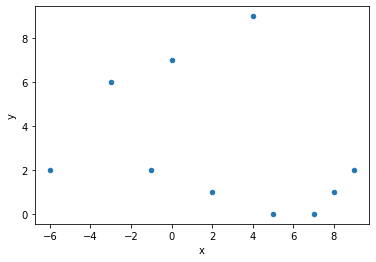

In [ ]:
#plotting the points into a 2D plot
dataset.plot(kind='scatter',x='x',y='y')
plt.show()

In [ ]:
dataset.describe()

,x,y
count,10.000000,10.000000
mean,2.500000,3.000000
std,4.972145,3.162278
min,-6.000000,0.000000
25%,-0.750000,1.000000
50%,3.000000,2.000000
75%,6.500000,5.000000
max,9.000000,9.000000


In [ ]:
#elbow method
#performing k mean clustering 10 times and calculate the SSE or sum of sqaured distances
sum_of_distances = []
K = range(1,11)
print("Sum of squared distances: ")
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(dataset)
  sum_of_distances.append(km.inertia_)
  print("k = ",k,": ",km.inertia_)

Sum of squared distances: 
k =  1 :  312.5
k =  2 :  127.2
k =  3 :  66.93333333333334
k =  4 :  45.833333333333336
k =  5 :  21.5
k =  6 :  13.0
k =  7 :  8.0
k =  8 :  3.0
k =  9 :  1.0
k =  10 :  0.0


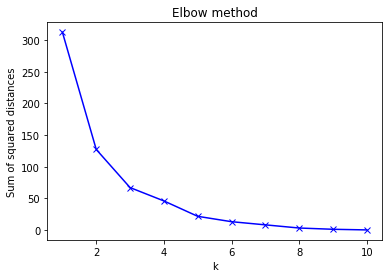

In [ ]:
#plotting SSE vs k graph
plt.plot(K,sum_of_distances, 'bx-')
plt.xlabel('k')
plt.ylabel("Sum of squared distances")
plt.title("Elbow method")
plt.show()

In [ ]:
#elbow is at 3

#performing clustering where k=3

k_means = KMeans(n_clusters=3)
k_means = k_means.fit(dataset)
print(k_means.labels_)


[0 1 0 2 1 0 1 1 0 2]


In [ ]:
#number of points in every cluster
results = k_means.labels_
results = pd.DataFrame(results, columns=['Cluster'])
results.groupby('Cluster').size()

Cluster
0    4
1    4
2    2
dtype: int64

In [ ]:
#centeroids of the clusters
centroids = k_means.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['c_x','c_y'])
print(centroids)

    c_x   c_y
0 -2.00  2.75
1  7.25  0.75
2  2.00  8.00


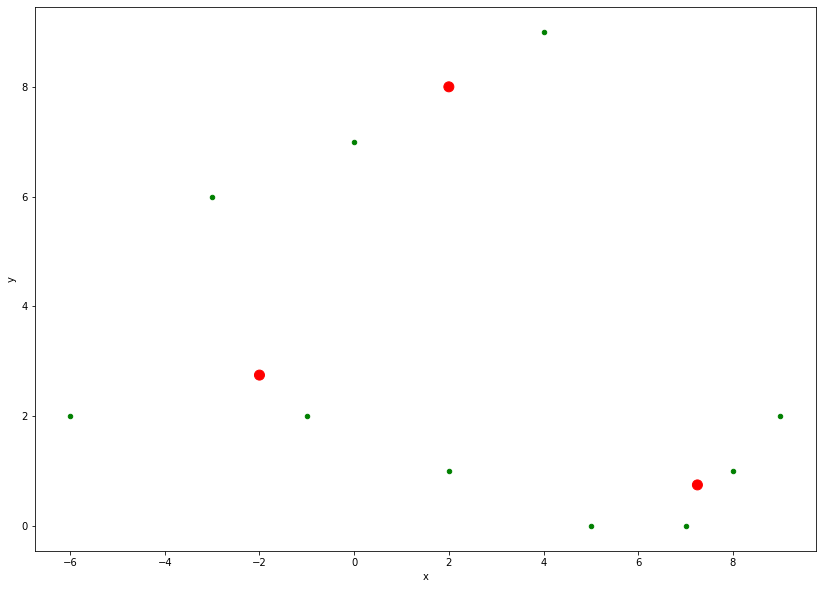

In [ ]:
#plotting the points and the centroid
s1 = dataset.plot(figsize = [14,10], kind = 'scatter',x='x',y='y',color='green')
centroids.plot(ax=s1, kind='scatter',x='c_x',y='c_y', color= 'red', marker='o',s=[100,100,100])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
predict = k_means.predict([[-3,6]])
print(predict)

[0]
